# Mapping Participation

This project is based on actual data analysis that I regularly perform as part of my Head of IT role at BALTIC Centre for Contemporary Art. 

![BALTIC](../Images/baltic.png?raw=true)

Baltic is a free to enter Contemporary Art Gallery on the banks of the River Tyne in Gateshead with charity status. The Gallery has an educational programme to accompany its Arts programme providing a variety of artist lead workshops both within the gallery and within the broader community. Off-site workshops includes pop-up acivities at regional festivals and events as well as activities in local libraries and children's centres.

The residents of the Gateshead area are one of BALTIC key audience and as part of BALTIC's partnership with Gateshead Council, ensuring that Gateshead residence engage with BALTIC's artistic programme is therefore a key priority. In order to ensure that targets are met participants of learning activities either on site and off site are asked to provide postcode details when they attend an event. This Data is then analysed.

![Map pin](Images/mappin.png?raw=true)

From landmark locations to participant postcodes, many dataset contain some form of geographical data. Being able to visualise this data is often key to understanding the relationship between the datapoints and mapping provides a great way to do this. 

When it comes to maps there are an increasing number of options, from [googlemaps](https://www.google.co.uk/maps) and [openstreet maps](https://www.openstreetmap.org/#map=5/54.910/-3.432) to figurative maps and heatmaps. 


## Working with Postcodes

Most of us will will not know the longatude and latitudes of a given location, but we may well know the postcode, for this reason its more common to capture postcodes than any other form of location data.  

Postcode data however is not terribly useful in its own right, postcode areas highly irregular, different postcodes are different sizes and postcode sysyem is not layed out in a any form of regular pattern. It is therefore very difficult to get insights into geographical groupings from post code alone.

## Getting Co-ordinates

Before we can start plotting locations it is therefore necessary to be able to convert postcode into some form of co-ordinate system. There are several co-ordinate systems to choose. For example longatude and latitudes or grid reference.

There are many ways that you can get x and y co-ordinates from postcodes. I used a [freemaptools](https://www.freemaptools.com/convert-uk-postcode-to-lat-lng.htm)

If you wanted you could automate this process by using google's [geocoding api](https://developers.google.com/maps/documentation/geocoding/intro#geocoding) for developers.

# Visualizing Learning participation on Google Maps

The first stage in analysing learning participation was to visualise where participants live by plotting their geographical data on google maps. In order to plot locations on google maps, postcode data must first the converted to latitude and longitude. In the first instance this was performed as an excel vlookup based on data taken from Data.gov.uk relating to regional parlimentary seats. https://www.freemaptools.com/convert-uk-postcode-to-lat-lng.htm was used to get latitude and longitude details for post codes outside of the region.

The data was loaded to Google maps as 3 separate csv files, each .csv file being imported into its own layer within which can be individually styled and labelled.

![Google Maps](Images/googlemaps.jpeg?raw=true)

The first of the .csv files contained the location data for the venues at which each of the learning activities took place. The second .csv contained information about participants and activities that took place with the Gallery itself and the final .csv caontained the same information for events that took place at off-site locations. The participant information included the dates times and seasons of the different activities, all of which can be used define the colours, styles and visibility of the markers on the map in order to visualize participation patterns. 

The boundaries of the Gatehead Local Authority area were downloaded as a .kml file from https://mapit.mysociety.org/area/2523.html. This .kml was then imported into a layer within google maps which clearly identify participation by residents of the metropolitan borough area on the map.


![GoogleMap 2](Maps/learningparticipation20182.png?raw=true)


In addition to providing useful monitoring information about the participation in arts activities within the Map data . The participation map can be used as a planning tool to help develope future offsite learning activities aimed at targeting areas not currently being reach by activities undertaken within the gallery. 

# Creating a basic longitude & latitude plot with matplotlib

Longitude and Latitude basically just x and Y values. If your datapoints are reasonably close together you can plotted them on a very basic level as a scatter plot with matplotlib, seaborn , Bokeh or any other drawing/plotting library.

The Earth is of course a sphere, and if your datapaoints are further apart or you want to plot them in more accuracy you would need to adjust for this. In terms of initial exploratory data analysis however a scatter plot is a very quick way to get an idea of the geographical distribution of your data points.

                       Venue  postcode  Latitude  Longitude
0                     Baltic   NE8 3BA  54.96921   -1.59828
1            Birtley Library   DH3 1LE  54.89683   -1.57714
2   Blaydon Childrens Centre  NE21 5BT  54.96467   -1.71207
3           Chopwell Library  NE17 7HZ  54.91862   -1.81641
4  Chowdene Childrens Centre   NE9 7TU  54.92094   -1.58901


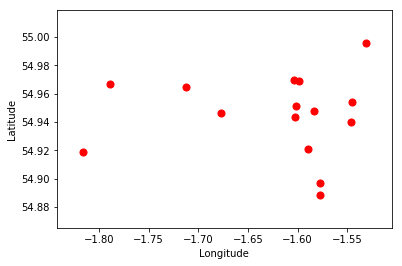

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab

# import the data into a dataframe
df=pd.read_csv('Data/baltic_venues.csv', sep=',')
print(df.head())

# create a plot

plt.scatter(df['Longitude'],df['Latitude'], s=50, c='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

pylab.savefig('Maps/basicplot.png')
plt.show()

# Mapping with Folium

While a scatter plot gives you a very basic idea of the location of the datapoints in relation to each other, if you want to see how that relates to features like transport networks, facilities you really need to plot this on a map.

![Folium Map](Images/foliummap.png?raw=true)

[Folium](https://github.com/python-visualization/folium) is a library that allows you to plot maps in python. In this example i've created a map with Folium, set the default view and passed the same longitude and latitude values and venue names and as markers to our map.

In [75]:
# Making a map using the folium module

# import libraries
import folium
import pandas as pd
import pylab

# import the data into a dataframe
df=pd.read_csv('Data/baltic_venues.csv', sep=',')

# set default position and scale
lon, lat = -1.49828,   54.79921
zoom_start = 10

# initiate map
venue_map = folium.Map(
    location=[lat, lon],
    tiles='OpenStreetMap',
    zoom_start=zoom_start,
    control_scale=True)

# create datapoints manually
venues = [
    {'loc': [54.96921, -1.59828], 'label': 'Baltic'},
    {'loc': [54.89683, -1.57714,], 'label': 'Birtley Library'},
    {'loc': [54.96467, -1.71207], 'label': 'Blaydon Childrens Centre'}] 

# create datapoints with loop
allvenues=[]
for i, row in df.iterrows():
    venue={'loc': [row['Latitude'], row['Longitude']], 'label':row['Venue']}
    allvenues.append(venue)

# Add markers to the map
for venue in allvenues:
    marker = folium.Marker(location=venue['loc'], popup=venue['label'])
    marker.add_to(venue_map)

# The last object in the cell always gets shown in the notebook
pylab.savefig('Maps/folium.png')
venue_map.save('Maps/foliumscale.html')
venue_map

# Statistical Participation Numbers for on/offsite Activity from within Gateshead Local Authority Area

Where we used the .kml file within Google Maps to see the boundary for the Gateshead Local Authority area. We will need a list or dictionary of all of the postcodes considered to be within the Local Authority area in order to establish what percentages of participant are residents of Gateshead statistically or programmatically.

Although there are a large number of online resources for local authority data, we were unable to find a full list of postcodes by Local Authority in a format that could easily be downloaded and imported to python, the majority of data using alternate geographical units. 

Some generic data was available with partial postcode information within each Local authority (eg NE40, NE36 etc). It was possible to match the partial references with full postcodes from the parlimentary seat dataset and then further refinw this list by plotting each of the datapoints on google maps and comparing it with the county boundaries removing any unwanted datapoints manually.

In [ ]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab

# import all postcodes within GLA Area 
postcodefile="Data/Gatesheadpostcodes.csv"
postcodes=pd.read_csv(postcodefile)
# print(postcodes.shape)

# Transfer GLA postcodes into a dictionary
# Initialize an empty dictionary
postcodedict = {}
# Iterate over codes in postcodes column
codes = postcodes["postcode"]
for c in codes:
    # If the c is in postcodedict, add 1
    if c in postcodedict.keys():
        postcodedict[c]=((postcodedict)[c])+1
    # Else add the count to postcodedict, set the value to 1
    else:
        postcodedict[c]=1    

# import onsite participant postcodes
BALTICfile="Data/BALTIC_Learning_Activities_sep17.csv"
b_participants=pd.read_csv(BALTICfile, encoding = "ISO-8859-1", sep=',')

# Analyse oparticipant postcodes
# initiate counts
bgateshead=0
bcount=0
bcodes = b_participants["Postcode"]

# Iterate over codes in postcodes column
for c in bcodes:

    # If the c is in postcodedict, add 1
    if c in postcodedict.keys():
        bgateshead=bgateshead+1
    # Else add the count to visitcount, set the value to 1
    else:
        bcount=bcount+1    

# print results
print("-------------------------------------")
print(str(bgateshead) + " participants of BALTIC onsite learning events came from Gateshead")
print(str(bcount) + " participants of BALTIC onsite learning events came from outside of Gateshead")
print("-------------------------------------")

# import offsite participant postcodes
offsitefile="Data/OffSite_Learning_Activities_sep17.csv"
off_participants=pd.read_csv(offsitefile)

# initiate counts
offgateshead=0
offcount=0
offcodes = off_participants["Postcode"]

# Iterate over codes in postcodes column
for c in offcodes:

    # If the c is in postcodedict, add 1
    if c in postcodedict.keys():
        offgateshead=offgateshead+1
    # Else add the count to visitcount, set the value to 1
    else:
        offcount=offcount+1         
        
print(str(offgateshead) + " participants of BALTIC offsite learning events came from Gateshead")
print(str(offcount) + " participants of BALTIC offsite learning events came from outside of Gateshead")
print("-------------------------------------")

# Participation by Date

This Graph was one of the last elements added at the 'putting it altogether' stage, by which time i had learnt a lot more about the structure of the final script, i had progressed to using a single file for all of the data and was declaring all of the dictionaries at the beginning - so the code may seem a little out of place in the cell sequence, but i wanted to practice producing the graph in its own cell before merging it to the final stage.


In [ ]:
### import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
from matplotlib import cm
%matplotlib inline

# initialize empty dictionaries
Date_dict={}; Gates_date_dict={}

# import all participant data & replace blank Numbers with default of 1
Activitiesfile="Data/All_Learning_Activities_sep17.csv"
Participants=pd.read_csv(Activitiesfile, encoding = "ISO-8859-1", sep=',')
for column in Participants:
    Participants['Number'] = Participants['Number'].replace(r'\s+', np.nan, regex=True)
    Participants['Number'] = Participants['Number'].fillna(1) 
    
# process time/date data
Participants['Date'] = pd.to_datetime(Participants['Date'], format="%d/%m/%y")

# Put Participant Date data into dictionary
for index, row in Participants.iterrows():    
    if row['Date'] in Date_dict.keys():
        Date_dict[row['Date']]=((Date_dict[row['Date']])+(int(row['Number'])))
    else:
        Date_dict[row['Date']]=(int(row['Number']))   
        
# create a scatter plot of Participation by date
Date_list=(list(sorted(Date_dict.keys())))
Participation_list = [Date_dict[key] for key in sorted(Date_dict.keys(), reverse=False)]
                
plt.scatter(Date_list,Participation_list,alpha=0.7) #s=scale,c=colour
plt.xlabel("Date")
plt.ylabel("Participation")
plt.title('Participation by Date');

# limit the axis to include only what you want to display
# plt.ylim(['00:00:00','24:00:00'])
# plt.yticks(('10:00:00','12:00:00','14:00:00','16:00:00','18:00:00','20:00:00'))
## plt.xlim(['2017-06-17','2017-07-09'])
# plt.xticks(("2017-03-01",'2017-04-01','2017-04-30'))
plt.xticks(rotation='90')
# plt.subplots_adjust(bottom=0.05)

# print("\n Conversions by time and date : \n ")
pylab.savefig('Graphs/Participation.png')   # save the figure to file
pylab.savefig('Graphs/Participation.pdf') # savefig('salesdistribution.pdf')
plt.show()

# Putting it all together